In [1]:
import pandas as pd
# import statsmodels.api as sm
from scipy.stats import mannwhitneyu, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
bam_mappings = pd.read_csv('/scratch/groups/dpwall/personal/chloehe/unmapped_reads/aws/bam_mappings.csv', sep='\t')
bam_mappings = bam_mappings[['family', 'participant_id', 'sample_id', 'relationship', 'sex_numeric', 'status',
              'batch_name', 'sequencing_plate', 'bio_seq_source', 'derived_affected_status']]
bam_mappings = bam_mappings[(bam_mappings['status'] == 'Passed_QC_analysis_ready') & (bam_mappings['relationship'] == 'sibling')]

In [3]:
bam_mappings.shape

(2679, 10)

In [16]:
bam_mappings.head()

,family,participant_id,sample_id,relationship,sex_numeric,status,batch_name,sequencing_plate,bio_seq_source,derived_affected_status
2,AU1005,AU1005302,02C10542,sibling,2.0,Passed_QC_analysis_ready,WAL10680_B02,MTR-00927,LCL,broad-spectrum
3,AU1005,AU1005301,02C10543,sibling,1.0,Passed_QC_analysis_ready,WAL10680_B02,MTR-00927,LCL,autism
5,AU1004,AU1004301,02C10704,sibling,1.0,Passed_QC_analysis_ready,WAL1403,MTR-00010,LCL,autism
14,AU0918,AU0918302,02C10855,sibling,2.0,Passed_QC_analysis_ready,WAL10680_B01,MTR-00024,LCL,autism
16,AU0918,AU0918301,02C10857,sibling,1.0,Passed_QC_analysis_ready,WAL10680_B01,MTR-00024,LCL,autism


In [19]:
bam_mappings['derived_affected_status'].value_counts(dropna=False)

autism            1977
NaN                515
broad-spectrum     120
nqa                 59
not-met              7
asd                  1
Name: derived_affected_status, dtype: int64

In [3]:
nt_id = list(bam_mappings[(bam_mappings['derived_affected_status'].isna()) | (bam_mappings['derived_affected_status'] == 'not-met')]['sample_id'])
autism_id = set(bam_mappings['sample_id']).difference(set(nt_id))
print(f'Neurotypical: {len(nt_id)}')
print(f'Autism: {len(autism_id)}')

Neurotypical: 522
Autism: 2157


## Virus

In [4]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
df.fillna(0., inplace=True)
id_col = [x.split(' - ')[0] for x in list(df.index)]
df['sample_id'] = id_col
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,"Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102",Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,"Torque teno midi virus 8 DNA, isolate: MDJN1",Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A,sample_id
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23190
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23194
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23208
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23209
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23211


In [5]:
nt_df = df[df['sample_id'].isin(nt_id)]
autism_df = df[df['sample_id'].isin(autism_id)]
nt_df.drop(['batch', 'sample_id'], axis=1, inplace=True)
autism_df.drop(['batch', 'sample_id'], axis=1, inplace=True)
print(nt_df.shape)
print(autism_df.shape)

(522, 248)
(2157, 248)


/home/users/chloehe/.local/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
def mannwhitneyu_with_fail(x, y):
    try:
        a = mannwhitneyu(x=x, y=y).pvalue
    except: 
        return np.nan
    return a

In [7]:
alpha = 0.05 / len(df.columns.drop(['batch', 'sample_id']))
n_hits = 0
hits = []
for col in df.columns.drop(['batch', 'sample_id']):
    p = mannwhitneyu_with_fail(nt_df[col], autism_df[col])
    if p < alpha:
        print(f'{col}\t{p}')
        n_hits += 1
        hits.append(col)
print(f'\nTotal hits: {n_hits}')


Total hits: 0


In [56]:
nt_df = df[df['sample_id'].isin(nt_id)]
autism_df = df[df['sample_id'].isin(autism_id)]
print(nt_df.shape)
print(autism_df.shape)
autism_df['derived_affected_status'] = 'autism'
nt_df['derived_affected_status'] = 'neurotypical'
combined_df = pd.concat([autism_df, nt_df], axis=0)

(522, 250)
(2157, 250)


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
columns = list(df.columns[:51])
columns.extend(['derived_affected_status'])
df_melt = pd.melt(combined_df.loc[:, columns].reset_index(), id_vars=['index', 'batch', 'derived_affected_status'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)
df_melt.head()

,index,batch,derived_affected_status,virus,read counts
0,03C23190 - LCL - AU1157,batch_01009,autism,Human herpesvirus 6B,0.0
1,03C23194 - WB - AU1157,batch_01009,autism,Human herpesvirus 6B,0.0
2,03C23221 - LCL - AU1165,batch_01009,autism,Human herpesvirus 6B,0.0
3,03C23225 - LCL - AU1165,batch_01009,autism,Human herpesvirus 6B,0.0
4,03C23370 - LCL - AU1172,batch_01009,autism,Human herpesvirus 6B,0.0


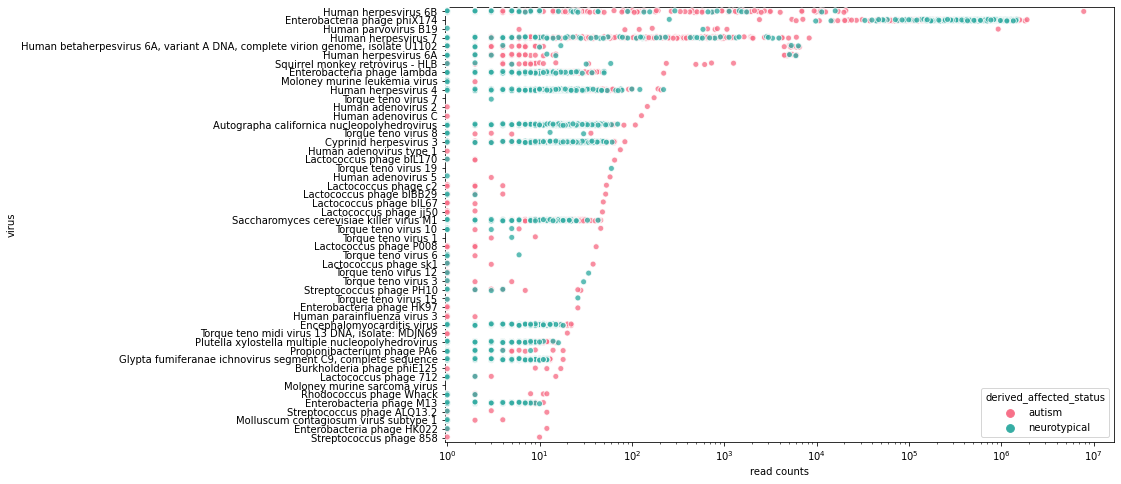

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xscale="log")
chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='derived_affected_status', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
plt.show()

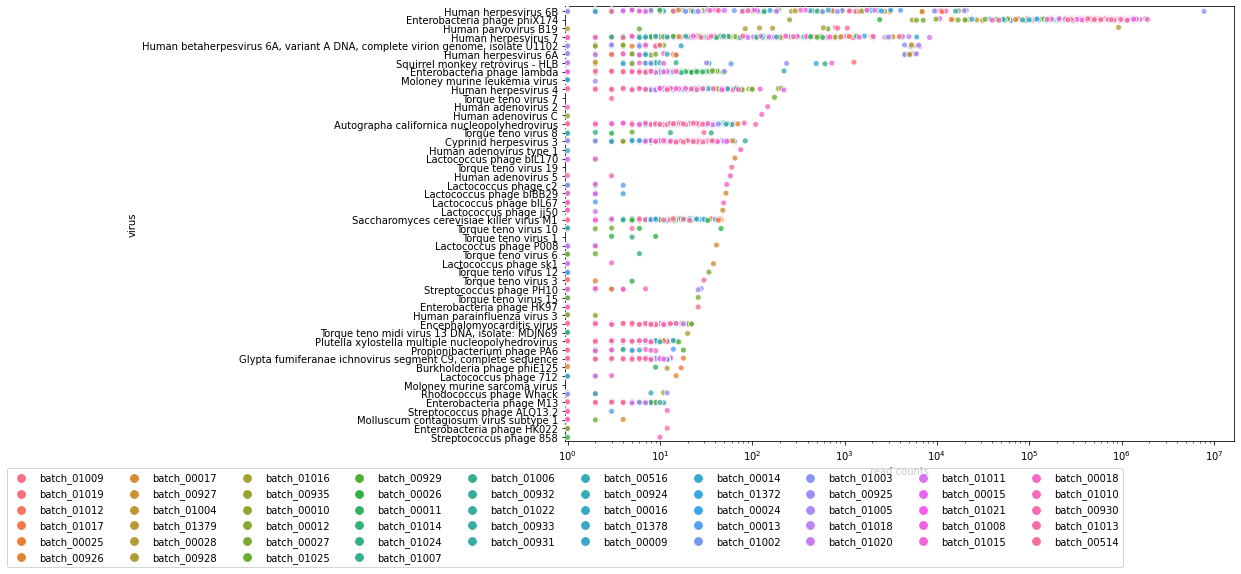

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xscale="log")
chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='batch', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
plt.show()

## Bacteria

In [23]:
df = pd.read_csv('bacteria_abundance_data_agg.csv', index_col=0, sep='\t')
df.fillna(0., inplace=True)
id_col = [x.split(' - ')[0] for x in list(df.index)]
df['sample_id'] = id_col
df.head()

,'Nostoc azollae' 0708,AECQ01000002,AECQ01000003,AECQ01000004,AECQ01000006,AECQ01000007,AECQ01000008,AECQ01000011,AECQ01000012,AECQ01000013,...,Yersinia rohdei,Yersinia ruckeri,Zasmidium cellare culture-collection,Zunongwangia profunda SM-A87,Zygosaccharomyces rouxii CBS,Zymomonas mobilis mobilis,marine gamma proteobacterium,type,batch,sample_id
03C23190 - LCL - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LCL,batch_01009,03C23190
03C23194 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WB,batch_01009,03C23194
03C23208 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WB,batch_01009,03C23208
03C23209 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WB,batch_01009,03C23209
03C23211 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,WB,batch_01009,03C23211


In [24]:
nt_df = df[df['sample_id'].isin(nt_id)]
autism_df = df[df['sample_id'].isin(autism_id)]
nt_df.drop(['batch', 'sample_id'], axis=1, inplace=True)
autism_df.drop(['batch', 'sample_id'], axis=1, inplace=True)
print(nt_df.shape)
print(autism_df.shape)

(522, 2176)
(2157, 2176)


/home/users/chloehe/.local/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
alpha = 0.05 / len(df.columns.drop(['batch', 'sample_id']))
n_hits = 0
hits = []
for col in df.columns.drop(['batch', 'sample_id']):
    p = mannwhitneyu_with_fail(nt_df[col], autism_df[col])
    if p < alpha:
        print(f'{col}\t{p}')
        n_hits += 1
        hits.append(col)
print(f'\nTotal hits: {n_hits}')

Fusobacterium ulcerans	8.499773070360437e-24
Mollicutes bacterium D7	3.0808223551152704e-20

Total hits: 2


In [40]:
nt_df = df[df['sample_id'].isin(nt_id)]
autism_df = df[df['sample_id'].isin(autism_id)]
print(nt_df.shape)
print(autism_df.shape)
autism_df['derived_affected_status'] = 'autism'
nt_df['derived_affected_status'] = 'neurotypical'
combined_df = pd.concat([autism_df, nt_df], axis=0)

(522, 2178)
(2157, 2178)


/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
hits.extend(['batch', 'derived_affected_status'])
df_melt = pd.melt(combined_df.loc[:, hits].reset_index(), id_vars=['index', 'batch', 'derived_affected_status'])
df_melt.rename(columns={'variable': 'virus', 'value': 'read counts'}, inplace=True)
df_melt.head()

,index,batch,derived_affected_status,virus,read counts
0,03C23190 - LCL - AU1157,batch_01009,autism,Fusobacterium ulcerans,188121.0
1,03C23194 - WB - AU1157,batch_01009,autism,Fusobacterium ulcerans,221493.0
2,03C23221 - LCL - AU1165,batch_01009,autism,Fusobacterium ulcerans,184169.0
3,03C23225 - LCL - AU1165,batch_01009,autism,Fusobacterium ulcerans,207105.0
4,03C23370 - LCL - AU1172,batch_01009,autism,Fusobacterium ulcerans,166015.0


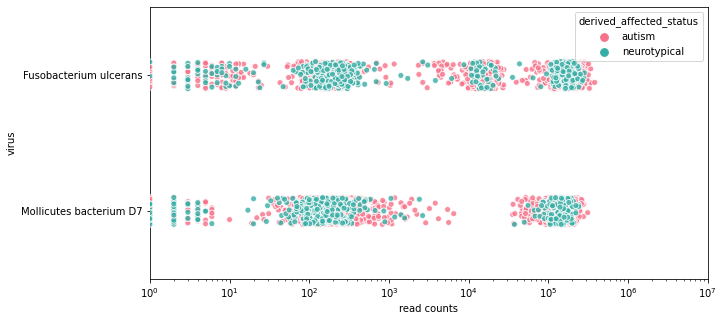

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(xscale="log", xlim =(10e-1, 10e6))
chart = sns.stripplot(data=df_melt, x='read counts', y='virus', hue='derived_affected_status', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
# plt.legend(loc="lower center", bbox_to_anchor=(0, -0.3), ncol=10)
plt.show()

## Total Viral Load

In [104]:
df = pd.read_csv('virus_abundance_data.csv', index_col=0)
df.fillna(0., inplace=True)
id_col = [x.split(' - ')[0] for x in list(df.index)]
df['sample_id'] = id_col
df.head()

,batch,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,"Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102",Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,...,"Torque teno midi virus 8 DNA, isolate: MDJN1",Hepatitis C virus genotype 1,Lactobacillus phage Lv-1,Woodchuck hepatitis virus,Pseudomonas phage EL,Enterobacteria phage RB32,Bordetella phage BIP-1,Staphylococcus phage SAP-26,Enterococcus phage phiFL4A,sample_id
03C23190 - LCL - AU1157,batch_01009,0.0,1085585.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23190
03C23194 - WB - AU1157,batch_01009,0.0,1064727.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23194
03C23208 - WB - AU1157,batch_01009,0.0,1090048.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23208
03C23209 - WB - AU1157,batch_01009,0.0,1057893.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23209
03C23211 - WB - AU1157,batch_01009,0.0,1231973.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03C23211


In [105]:
sum_col = df.drop(['batch', 'sample_id'], axis=1).sum(axis=1)
total_df = pd.concat([sum_col, df['sample_id']], axis=1)
nt_total = total_df[total_df['sample_id'].isin(nt_id)]
autism_total = total_df[total_df['sample_id'].isin(autism_id)]

In [63]:
mannwhitneyu_with_fail(nt_total[0], autism_total[0])

0.43720352187038614

In [106]:
autism_total['derived_affected_status'] = 'autism'
nt_total['derived_affected_status'] = 'neurotypical'
virus_total = pd.concat([autism_total, nt_total], axis=0)
virus_total.rename({0: 'read counts'}, axis=1, inplace=True)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Total Bacterial Load

In [135]:
df = pd.read_csv('bacteria_abundance_data_agg.csv', index_col=0, sep='\t')
df.fillna(0., inplace=True)
id_col = [x.split(' - ')[0] for x in list(df.index)]
df['sample_id'] = id_col
df.head()

,'Nostoc azollae' 0708,AECQ01000002,AECQ01000003,AECQ01000004,AECQ01000006,AECQ01000007,AECQ01000008,AECQ01000011,AECQ01000012,AECQ01000013,...,Yersinia rohdei,Yersinia ruckeri,Zasmidium cellare culture-collection,Zunongwangia profunda SM-A87,Zygosaccharomyces rouxii CBS,Zymomonas mobilis mobilis,marine gamma proteobacterium,type,batch,sample_id
03C23190 - LCL - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LCL,batch_01009,03C23190
03C23194 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WB,batch_01009,03C23194
03C23208 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WB,batch_01009,03C23208
03C23209 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WB,batch_01009,03C23209
03C23211 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,WB,batch_01009,03C23211


In [66]:
sum_col = df.drop(['batch', 'sample_id'], axis=1).sum(axis=1)
total_df = pd.concat([sum_col, df['sample_id']], axis=1)
nt_total = total_df[total_df['sample_id'].isin(nt_id)]
autism_total = total_df[total_df['sample_id'].isin(autism_id)]

mannwhitneyu_with_fail(nt_total[0], autism_total[0])

1.5877891797984946e-25

**Drop Fusobacterium and Mollicutes**

In [132]:
df.drop(['Fusobacterium ulcerans', 'Mollicutes bacterium D7'], axis=1, inplace=True)
sum_col = df.drop(['batch', 'sample_id'], axis=1).sum(axis=1)
total_df = pd.concat([sum_col, df['sample_id']], axis=1)
nt_total = total_df[total_df['sample_id'].isin(nt_id)]
autism_total = total_df[total_df['sample_id'].isin(autism_id)]

In [133]:
mannwhitneyu_with_fail(nt_total[0], autism_total[0])

0.4444311909211831

In [109]:
autism_total['derived_affected_status'] = 'autism'
nt_total['derived_affected_status'] = 'neurotypical'
bacteria_total = pd.concat([autism_total, nt_total], axis=0)
bacteria_total.rename({0: 'read counts'}, axis=1, inplace=True)

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
virus_total['type'] = 'virus'
bacteria_total['type'] = 'bacteria'
combined_df = pd.concat([virus_total, bacteria_total], axis=0)
combined_df.head()

,read counts,sample_id,derived_affected_status,type
03C23190 - LCL - AU1157,1085665.0,03C23190,autism,virus
03C23194 - WB - AU1157,1064794.0,03C23194,autism,virus
03C23221 - LCL - AU1165,684538.0,03C23221,autism,virus
03C23225 - LCL - AU1165,744160.0,03C23225,autism,virus
03C23370 - LCL - AU1172,1060947.0,03C23370,autism,virus


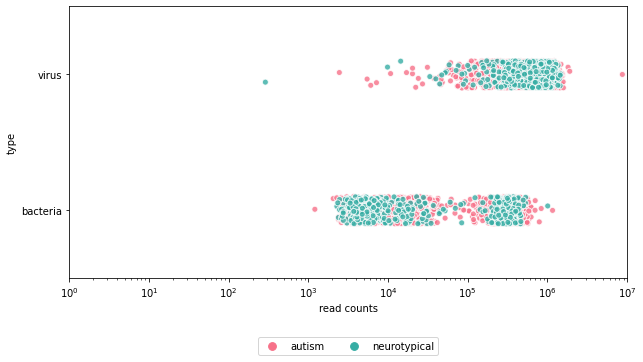

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(xscale="log", xlim =(10e-1, 10e6))
chart = sns.stripplot(data=combined_df, x='read counts', y='type', hue='derived_affected_status', orient='h', alpha=0.8,
                      linewidth=1, size=6, edgecolor='white', palette='husl')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.show()

## Virus 
**With family as covariate**

In [5]:
df_virus = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/results/df_virus_filtered.csv', index_col=0)
df_virus.head(2)

,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,Human herpesvirus 4,Torque teno virus 7,...,Moloney murine sarcoma virus,Rhodococcus phage Whack,Enterobacteria phage M13,Streptococcus phage ALQ13.2,Molluscum contagiosum virus subtype 1,Enterobacteria phage HK022,Streptococcus phage 858,batch,type,family
03C23190 - LCL - AU1157,0.0,1085585.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0,0.0,...,0.0,0.0,4.0,0.0,0.0,1.0,0.0,batch_01009,LCL,AU1157
03C23194 - WB - AU1157,0.0,1064727.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,batch_01009,WB,AU1157


In [7]:
id_col = [x.split(' - ')[0] for x in list(df_virus.index)]
df_virus['sample_id'] = id_col
nt_df = df_virus[df_virus['sample_id'].isin(nt_id)]
autism_df = df_virus[df_virus['sample_id'].isin(autism_id)]
print(nt_df.shape)
print(autism_df.shape)

(522, 53)
(2157, 53)


In [11]:
autism_df['derived_affected_status'] = 'autism'
nt_df['derived_affected_status'] = 'neurotypical'
combined_df = pd.concat([autism_df, nt_df], axis=0)
combined_df.drop('sample_id', axis=1, inplace=True)
combined_df.head(2)

,Human herpesvirus 6B,Enterobacteria phage phiX174,Human parvovirus B19,Human herpesvirus 7,Human herpesvirus 6A,Squirrel monkey retrovirus - HLB,Enterobacteria phage lambda,Moloney murine leukemia virus,Human herpesvirus 4,Torque teno virus 7,...,Rhodococcus phage Whack,Enterobacteria phage M13,Streptococcus phage ALQ13.2,Molluscum contagiosum virus subtype 1,Enterobacteria phage HK022,Streptococcus phage 858,batch,type,family,derived_affected_status
03C23190 - LCL - AU1157,0.0,1085585.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,batch_01009,LCL,AU1157,autism
03C23194 - WB - AU1157,0.0,1064727.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,batch_01009,WB,AU1157,autism


In [6]:
# fam_counts = pd.concat([nt_df['family'].value_counts(), autism_df['family'].value_counts()], axis=1)
# fam_counts.columns = ['neurotypical', 'autism']
# fam_counts.fillna(0., inplace=True)
# fam_counts.head()

,neurotypical,autism
AU1393,4.0,3.0
AU0980,4.0,3.0
AU4032,3.0,4.0
AU3779,3.0,3.0
AU1937,3.0,3.0


(array([ 12., 434.,   0., 447.,   0.,  79.,  18.,   0.,   4.,   4.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

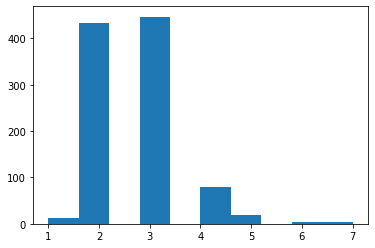

In [15]:
plt.hist(fam_counts.sum(axis=1).values)

(array([ 12.,   0., 427.,   0.,   0.,  87.,   0.,  11.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

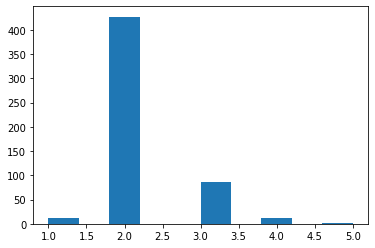

In [16]:
plt.hist(fam_counts[(fam_counts['neurotypical'] == 0.) | (fam_counts['autism'] == 0.)].sum(axis=1).values)

In [23]:
# alpha = 0.5 / len(df_virus.columns.drop(['batch', 'type', 'family']))
# for col in df_virus.columns.drop(['batch', 'type', 'family']):
#     nt_counts = []
#     autism_counts = []
#     for row in fam_counts.itertuples():
#         n = max(row.neurotypical, row.autism)
#         nt_counts.extend(nt_df[nt_df['family'] == row.Index][col].values)
#         autism_counts.extend(autism_df[autism_df['family'] == row.Index][col].values)
#         if row.neurotypical > row.autism:
#             autism_counts.extend(autism_df[autism_df['family'] == row.Index].sample(n=int(row.neurotypical - row.autism), replace=True)[col].values)
#         elif row.neurotypical < row.autism:
#             nt_counts.extend(nt_df[nt_df['family'] == row.Index].sample(n=int(row.autism - row.neurotypical), replace=True)[col].values)
#         print(len(nt_counts))
#         print(len(autism_counts))
#         assert len(nt_counts) == len(autism_counts)
#     _, p = wilcoxon(nt_counts, autism_counts)
#     if p < alpha:
#         print(f'{col}\t{p}')

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
alpha = 0.05 / len(df_virus.columns.drop(['batch', 'type', 'family', 'sample_id']))
hits = []
for col in df_virus.columns.drop(['batch', 'type', 'family', 'sample_id']):
    try:
        data = combined_df.loc[:, [col, 'family', 'derived_affected_status']]
        data.rename({col: 'read_count'}, axis=1, inplace=True)
        model = ols('read_count ~ C(derived_affected_status) + C(family)', data=data).fit()
        ancova_table = sm.stats.anova_lm(model, typ=2)
        print(f'{col}\t{ancova_table.loc["C(derived_affected_status)", "PR(>F)"]}')
        if ancova_table.loc['C(derived_affected_status)', 'PR(>F)'] < alpha:
            hits.append(col)
            print(col)
            print(ancova_table)
    except:
        print(f'{col}\tN/A')

Human herpesvirus 6B	0.9976661969216065
Enterobacteria phage phiX174	0.2568020833114511
Human parvovirus B19	N/A
Human herpesvirus 7	0.7919313833949292
Human herpesvirus 6A	0.6876171016618178
Squirrel monkey retrovirus - HLB	0.25109557859585907
Enterobacteria phage lambda	0.029492620043034077
Moloney murine leukemia virus	0.6254524010847663
Human herpesvirus 4	0.6186615464333955
Torque teno virus 7	0.9707941763351169
Human adenovirus 2	1.0
Human adenovirus C	0.9942222320889705
Autographa californica nucleopolyhedrovirus	0.6349304858417031
Torque teno virus 8	N/A
Cyprinid herpesvirus 3	0.9663637136764719
Human adenovirus type 1	1.0
Lactococcus phage bIL170	0.49881791995368385
Torque teno virus 19	0.06572340320171387
Human adenovirus 5	0.9747296754171371
Lactococcus phage c2	N/A
Lactococcus phage bIBB29	0.5516595710043817
Lactococcus phage bIL67	0.9292423558261246
Lactococcus phage jj50	0.4627691418228831
Saccharomyces cerevisiae killer virus M1	0.31373771647175147
Torque teno virus 10	0

## Bacteria
**With family as covariate**

In [13]:
df_bacteria = pd.read_csv('/scratch/groups/dpwall/personal/briannac/unmapped_reads/microbes/results/df_bacteria_filtered.csv', index_col=0)
print(df_bacteria.shape)
id_col = [x.split(' - ')[0] for x in list(df_bacteria.index)]
df_bacteria['sample_id'] = id_col
nt_df = df_bacteria[df_bacteria['sample_id'].isin(nt_id)]
autism_df = df_bacteria[df_bacteria['sample_id'].isin(autism_id)]
print(nt_df.shape)
print(autism_df.shape)

(4568, 525)
(522, 526)
(2157, 526)


In [14]:
autism_df['derived_affected_status'] = 'autism'
nt_df['derived_affected_status'] = 'neurotypical'
combined_df = pd.concat([autism_df, nt_df], axis=0)
combined_df.drop('sample_id', axis=1, inplace=True)
combined_df.head(2)

,AECW01000016,AECW01000031,AECW01000034,AECW01000051,AECW01000076,AECW01000099,AECW01000187,AECW01000219,AECW01000259,AECW01000451,...,Weissella paramesenteroides,Xanthobacter autotrophicus Py2,Xanthomonas axonopodis pv,Xanthomonas campestris pv,Xanthomonas oryzae pv,Yarrowia lipolytica CLIB122,batch,type,family,derived_affected_status
03C23190 - LCL - AU1157,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,1.0,batch_01009,LCL,AU1157,autism
03C23194 - WB - AU1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,batch_01009,WB,AU1157,autism


In [16]:
alpha = 0.05 / len(df_bacteria.columns.drop(['batch', 'type', 'family', 'sample_id']))
hits = []
for col in df_bacteria.columns.drop(['batch', 'type', 'family', 'sample_id']):
    try:
        data = combined_df.loc[:, [col, 'family', 'derived_affected_status']]
        data.rename({col: 'read_count'}, axis=1, inplace=True)
        model = ols('read_count ~ C(derived_affected_status) + C(family)', data=data).fit()
        ancova_table = sm.stats.anova_lm(model, typ=2)
        if ancova_table.loc['C(derived_affected_status)', 'PR(>F)'] < alpha:
            print(f'{col}\t{ancova_table.loc["C(derived_affected_status)", "PR(>F)"]}')
            hits.append(col)
            print(col)
            print(ancova_table)
    except:
        print(f'{col}\tN/A')

Aggregatibacter aphrophilus NJ8700	N/A
Blautia hansenii 20583	N/A
Bordetella parapertussis 12822	N/A
Fusobacterium ulcerans	2.5921202417049728e-30
Fusobacterium ulcerans
                                  sum_sq      df           F        PR(>F)
C(derived_affected_status)  6.314392e+11     1.0  136.186373  2.592120e-30
C(family)                   1.286428e+13   997.0    2.782867  7.744486e-77
Residual                    7.789457e+12  1680.0         NaN           NaN
Lactobacillus iners 13335	N/A
Mollicutes bacterium D7	1.2353453344763597e-28
Mollicutes bacterium D7
                                  sum_sq      df           F        PR(>F)
C(derived_affected_status)  4.148634e+11     1.0  127.912556  1.235345e-28
C(family)                   9.737461e+12   997.0    3.011332  8.923324e-89
Residual                    5.448804e+12  1680.0         NaN           NaN
Pseudomonas putida W619	N/A
Raphidiopsis brookii D9	N/A
Streptococcus M143	N/A
Veillonella dispar	N/A
Veillonella parvula 2008	N/